# Kütüphaneleri ekleme

In [30]:
import pandas as pd
import numpy as np
import string
from sklearn import metrics

# Verisetini okuma ve inceleme

In [2]:
data=pd.read_excel('combined-csv-files.xlsx')

In [3]:
data.columns

Index(['label', 'tweet'], dtype='object')

In [4]:
data.head()

,label,tweet
0,normal,dunya saglik orgutu who coronavirus ile mucade...
1,normal,biliyor musunuz artik ios live fotograflariniz...
2,normal,gunluk konusmalarin guvenligini saglamak ve in...
3,normal,8 mart pazar kadinlargunu bugun size ilham ver...
4,normal,sevgi dolu bir gun gecirmeniz dilegiyle sevgil...


# Verisetindeki metinleri sayısal verilere dönüştürme ve ırkçı etiketini 1, normal etiketini 0 olarak yeniden etiketleme 

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
cv=CountVectorizer()

In [7]:
data['label']=data['label'].map({'normal':0, 'irkci':1})

In [8]:
data.head()

,label,tweet
0,0.0,dunya saglik orgutu who coronavirus ile mucade...
1,0.0,biliyor musunuz artik ios live fotograflariniz...
2,0.0,gunluk konusmalarin guvenligini saglamak ve in...
3,0.0,8 mart pazar kadinlargunu bugun size ilham ver...
4,0.0,sevgi dolu bir gun gecirmeniz dilegiyle sevgil...


In [9]:
data = data.fillna(0)

# Tweet ve label sütunlarını x ve y adında değişkenlere key, value mantığında atama. X key yani içerik, y de value yani içeriğe karşılık gelen sınıf değeri

In [10]:
x=data['tweet']
y=data['label']

# X ve y deki inf, NaN tanımsız değerleri, gereksiz sütunları kaldırma, x verisini CountVectorizer kullanarak metin verisini eğitim için sayısal veriye çevirip verisetini eğitim için son haline getirme

In [11]:
x.replace([np.inf, -np.inf], np.nan, inplace=True)

In [12]:
x = x.replace([np.inf, -np.inf], np.nan)
x = x.dropna()
x = x.reset_index()

In [13]:
x.drop(['index'], axis=1, inplace=True)

In [22]:
y = y.replace([np.inf, -np.inf], np.nan)
y = y.dropna()
y = y.reset_index()

In [23]:
y

,index,label
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
317,317,1.0
318,318,1.0
319,319,1.0
320,320,1.0


In [14]:
x = cv.fit_transform(data['tweet'].apply(lambda x: np.str_(x)))

In [15]:
x

<322x2306 sparse matrix of type '<class 'numpy.int64'>'
	with 5434 stored elements in Compressed Sparse Row format>

# Verisetini train ve test olmak üzere iki kısma ayırma. Verisetinin %80 lik kısmı train, %20 lik kısmını test olarak ayırma

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

# Naive-Bayes algoritmasını yükleme ve veriseti üzerinde eğitme

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
model=MultinomialNB()

In [24]:
model.fit(x_train, y_train)

MultinomialNB()

# Doğruluk puanlarını inceleme ve confusion matrix oluşturma

In [25]:
result=model.score(x_test, y_test)

In [26]:
result=result*100

In [27]:
result

98.46153846153847

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
predictions = model.predict(x_test)

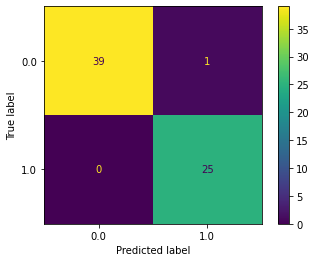

In [29]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

# Pickle kütüphanesi kullanarak modeli ve CountVectorizer'i daha sonra kullanmak üzere kaydetme

In [45]:
import pickle

In [46]:
pickle.dump(model, open("tsf.pkl","wb"))

In [47]:
pickle.dump(cv, open("vectorizer.pkl","wb"))